# SVD and image processing

We will look at how singular value decompositions can be applied to some problems in image processing.  Be sure to evaluate the cell below before you begin.

In [1]:
from PIL import Image
import numpy as np
import csv

def display_image(matrix):
    return Image.fromarray(matrix.astype('uint8'))

def approximation(A, k):
    u, s, v = np.linalg.svd(A)
    sigma = np.zeros(A.shape)
    for i in range(k):
        sigma[i][i] = s[i]
    return np.dot(u, np.dot(sigma, v))

def square(ll, dims, fillcolor, strokecolor):
    x, y = ll
    w, h = dims
    points = [ll, [x+w,y], [x+w, y+h], [x, y+h]]
    return polygon(points, rgbcolor=fillcolor, axes=False) + polygon(points,rgbcolor=strokecolor, fill=False,axes=False)

def display_vector(v):
    w = copy(v)
    w /= np.max(np.abs(v))
    return display_matrix(matrix(w).T)

def display_matrix(A):
    squares=[]
    y = A.nrows()-1
    for i, row in enumerate(A.rows()):
        x = 0
        for c in row:
            fillcolor = [c]*3
            if c < 0: fillcolor=[-c,0,0]
            strokecolor = [1 - f for f in fillcolor]           
            squares.append(square([x,y], [1,1], fillcolor, strokecolor))
            x += 1
        y -= 1
    return sum(squares)

### Image compression

Image files are typically pretty large so we would like to develop a way to store them more efficiently.  A compression algorithm is a means of detecting redundancy in an image and storing only what is essential.  For example, you may have seen the JPEG compression algorithm in your first linear algebra class.  If you evaluate the cell below, it will load a matrix $A$, whose dimensions are $25\times15$ and whose entries are either 0 or 1.  

In [2]:
data = csv.reader(open('letter.csv'), delimiter= ' ')
values = []
for datum in data:
    datum.pop(-1) 
    values.append([(1-float(d)) for d in datum])
A = matrix(RDF, values)
for row in values:
    print row

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1

If we interpret black as representing 0 and white as representing 1, this matrix represents an image as will be shown when you evaluate the cell below.

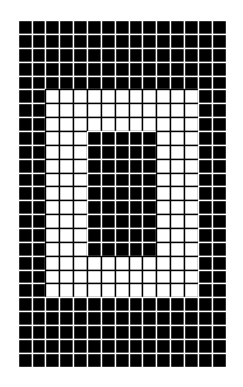

In [3]:
display_matrix(A)

Remember that the rank of $A$ is the dimension of the column space of $A$.  What do you think the rank of this matrix is?

You can find the singular values of $A$ below using `A.singular_values()`.  Does this verify your intuition about the rank of $A$?

In [0]:
A.singular_values()

Now find the singular value decomposition of $A$ below.

In [5]:
U, S, V = A.SVD()

You can pull out a column of a matrix `A` by `A.column(10)`, which will return a vector that is the 11th column of `A`.  You can also display a vector using the `display_vector(v)` to see a visual representation of the vector.  Once again, black represents 0, white represents 1, and red represents negative values.

How can you find a basis for the column space of $A$?  Use the cell below to see a visual representation of the basis vectors.

If we simply store each entry of $A$, how many numbers do we need to store?  (Remember that $A$ is $25\times15$.)

Using the singular value decomposition, we have 
$
A = \sigma_1{\mathbf u}_1{\mathbf v}_1^T + \sigma_2{\mathbf u}_2{\mathbf v}_2^T.
$
Rather than storing each entry of $A$, we could store the entries for ${\mathbf u}_1$, ${\mathbf u}_2$, ${\mathbf v}_1$ and ${\mathbf v}_2$ as well as the singular values $\sigma_1$ and $\sigma_2$.  Representing $A$ in this way, how many numbers do we need to store?

The *compression ratio* is the fraction of the total entries that we need to store when representing the matrix using the SVD.  What is the compression ratio for this image?

We can apply the same thinking to a real image, like the one you'll see below when you evaluate the cell.  The dimensions of the matrix $A$ representing the image are $316\times310$.  The matrix here consists of grayscale values that run between 0 and 255.

In [0]:
image = Image.open("utah-gray.png").convert('LA')
A = np.array(image)
A = A[:,:,0]
display_image(A)

Let's find the singular values of $A$ and plot them:

In [0]:
sigma = np.linalg.svd(A, compute_uv = False)
list_plot(zip(range(len(sigma)), sigma), plotjoined = True)

Notice how the singular values fall off pretty quickly.  That makes us think that maybe we can store the information using an approximation:

$$
A \approx \sigma_1{\mathbf u}_1{\mathbf v}_1^T + \sigma_2{\mathbf u}_2{\mathbf v}_2^T + \ldots + \sigma_k{\mathbf u}_k{\mathbf v}_k^T.
$$

You can view an approximation using various values of $k$ using the cell below.  Start with $k=100$.  How does the image look?  It is a faithful representation?  How about $k=50$?  $k=10$?  $k=1$?

In [0]:
k = 100
display_image(approximation(A, k))

What is the compression ratio if you store the image using the approximation $k=50$?

### Denoising data

Sometimes data arrives with 'noise', which can obscure the data we'd like to study.  Have a look at the image and matrix $A$ below.

In [0]:
data = csv.reader(open('noise.csv'))
values = []
for datum in data:
    datum.pop(-1) 
    datum[0] = datum[0][1:]
    values.append([n(float(d)^2,digits=3) for d in datum])
A = matrix(RDF, values)
for row in values:
    print row

We can look at these values below.  As you can see, there are splotchy areas of gray that don't seem like they belong.  Maybe this is the result of scanning an image.

In [0]:
display_matrix(A)

Let's look at the singular values.  What do you notice about them?

In [0]:
list_plot(A.singular_values(), plotjoined=True)

It looks like there are three significant singular values and the rest are extremely close to 0.  We can imagine that the noise is contained in the small singular values so we will replace $A$ by its approximation:

$$
A \approx \sigma_1{\mathbf u}_1{\mathbf v}_1^T + \sigma_2{\mathbf u}_2{\mathbf v}_2^T + \sigma_3{\mathbf u}_3{\mathbf v}_3^T.
$$

The following cell shows you the approximation with $k=3$, but you may want to experiment with different values of $k$ and observe the approximation.

In [0]:
k = 3
U, S, V = A.SVD()
display_matrix(U.matrix_from_columns(range(k)) * S.submatrix(0,0,k,k) * V.matrix_from_columns(range(k)).T)

Well, it's not the perfect white background that we might want, but the image has been cleaned up when compared to the original.  The basic idea is that the data connected to large singular values (that is, the singular value $\sigma_j$ itself along with vectors ${\mathbf u}_j$ and ${\mathbf v}_j$) represent structure in the matrix, which is what we are usually interested in.  Sometimes we call this structure the *signal* because it contains the information that we are hoping to communicate.  The data connected to small singular values often represents random fluctuations, which is called *noise.*  As this example shows, the singular value decomposition helps us to separate the signal from the noise.